In [20]:
import numpy as np
from pylab import *
import os
%matplotlib inline

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
root = '/content/drive/My Drive/kappaTNG/'
ratio_path= os.path.join(root,'Clkk_ratio/')

In [23]:
zs = np.genfromtxt(ratio_path+'zs.dat')
zs

array([0.034467, 0.069515, 0.105182, 0.14151 , 0.178545, 0.216332,
       0.254921, 0.294363, 0.334713, 0.376027, 0.418368, 0.461799,
       0.506387, 0.552205, 0.599329, 0.647838, 0.697818, 0.749361,
       0.802561, 0.857522, 0.914352, 0.973168, 1.034093, 1.09726 ,
       1.162811, 1.230896, 1.301678, 1.37533 , 1.45204 , 1.532007,
       1.615449, 1.702597, 1.793703, 1.889038, 1.988896, 2.093596,
       2.203481, 2.318928, 2.440344, 2.568175])

In [24]:
ratios = np.array([np.genfromtxt(ratio_path+'ratio%02d.dat'%(i)) for i in range(1,41)])
print (ratios.shape) ## the three columns are ell, ratio, std_ratio
ell=ratios[0,:,0]
print (ell)

(40, 30, 3)
[ 101.8234  144.      160.9969  218.7537  284.3995  359.3011  446.1363
  562.7012  713.0505  892.3582 1056.544  1192.623  1335.852  1497.288
 1681.971  1888.175  2119.545  2377.31   2668.762  2993.712  3359.343
 3770.991  4229.178  4744.167  5324.426  5972.264  6700.116  7519.867
 8436.568  9465.563 ]


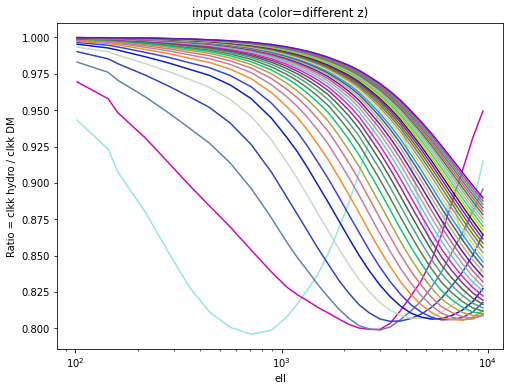

In [25]:
f, ax = subplots(1,1,figsize=(8,6))
seed(20)
for i in range(40):
  icolor=rand(3)
  ax.plot(ratios[i,:,0],ratios[i,:,1],color=icolor)
ax.set_xlabel('ell')
ax.set_ylabel('Ratio = clkk hydro / clkk DM')
ax.set_xscale('log')
ax.set_title('input data (color=different z)')
show()

In [26]:
############# fitting formula from Ken
zs2,  ls1,  ls2,  a1,  a2 = np.genfromtxt(root+'fitted_params_osato.txt', usecols=range(1,6)).T
ratio_osato_fun = lambda i: (1+(ell/ls1[i])**a1[i]) / (1+(ell/ls2[i])**a2[i])

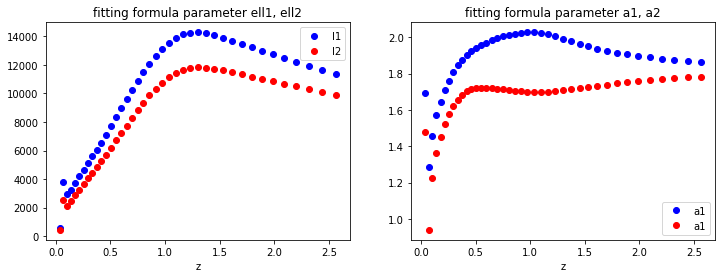

In [27]:
f, axes=subplots(1,2,figsize=(12,4))

axes[0].plot(zs, ls1,'bo',label='l1')
axes[0].plot(zs, ls2,'ro',label='l2')
axes[1].plot(zs, a1,'bo',label='a1')
axes[1].plot(zs, a2,'ro',label='a1')

axes[0].set_xlabel('z')
axes[1].set_xlabel('z')
axes[0].legend()
axes[1].legend()

axes[0].set_title('fitting formula parameter ell1, ell2')
axes[1].set_title('fitting formula parameter a1, a2')
show()

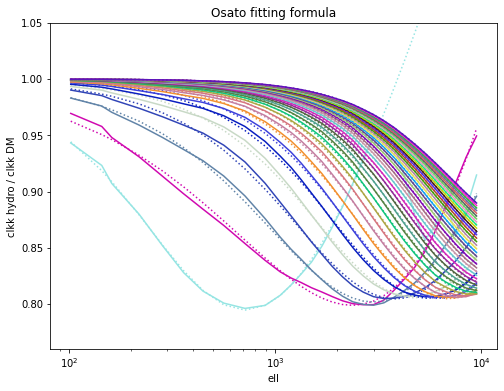

In [32]:
f, ax = subplots(1,1,figsize=(8,6))
seed(20)
for i in range(40):
  icolor=rand(3)
  ax.plot(ell,ratios[i,:,1],color=icolor)
  ax.plot(ell, ratio_osato_fun(i),':',color=icolor)
ax.set_xlabel('ell')
ax.set_ylabel('clkk hydro / clkk DM')
ax.set_xscale('log')
ax.set_ylim(0.76, 1.05)
ax.set_title('Osato fitting formula')
show()

In [9]:
## next, try to find a fitting formula with AI-Feynman https://github.com/SJ001/AI-Feynman
## https://github.com/dcshapiro/AI-Feynman/blob/master/AI_Feynman_2_0.ipynb
## or https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor
## https://umap-learn.readthedocs.io/en/latest/
## or https://gplearn.readthedocs.io/en/stable/

In [11]:
!pip install --quiet git+https://github.com/SJ001/AI-Feynman.git

In [12]:
from feynman import run_aifeynman
# run_aifeynman(root+"AI-Feynman/example_data/", "example1.txt", 30,
#               "14ops.txt", polyfit_deg=3, NN_epochs=500)

In [13]:
new_ratios = np.zeros(shape=ratios.shape)
new_ratios[:,:,0]=zs.reshape(40,1)
new_ratios[:,:,1:]=ratios[:,:,:-1]
new_ratios=new_ratios[1:].reshape(-1,3)

In [14]:
print (new_ratios[:50])
print (new_ratios.shape)

[[6.951500e-02 1.018234e+02 9.694769e-01]
 [6.951500e-02 1.440000e+02 9.578773e-01]
 [6.951500e-02 1.609969e+02 9.480709e-01]
 [6.951500e-02 2.187537e+02 9.307957e-01]
 [6.951500e-02 2.843995e+02 9.134492e-01]
 [6.951500e-02 3.593011e+02 8.979883e-01]
 [6.951500e-02 4.461363e+02 8.842849e-01]
 [6.951500e-02 5.627012e+02 8.698173e-01]
 [6.951500e-02 7.130505e+02 8.537454e-01]
 [6.951500e-02 8.923582e+02 8.388268e-01]
 [6.951500e-02 1.056544e+03 8.286057e-01]
 [6.951500e-02 1.192623e+03 8.231405e-01]
 [6.951500e-02 1.335852e+03 8.190492e-01]
 [6.951500e-02 1.497288e+03 8.144923e-01]
 [6.951500e-02 1.681971e+03 8.106676e-01]
 [6.951500e-02 1.888175e+03 8.066150e-01]
 [6.951500e-02 2.119545e+03 8.028506e-01]
 [6.951500e-02 2.377310e+03 8.003012e-01]
 [6.951500e-02 2.668762e+03 7.993873e-01]
 [6.951500e-02 2.993712e+03 7.994259e-01]
 [6.951500e-02 3.359343e+03 8.034760e-01]
 [6.951500e-02 3.770991e+03 8.123328e-01]
 [6.951500e-02 4.229178e+03 8.222357e-01]
 [6.951500e-02 4.744167e+03 8.3262

In [15]:
savetxt(root+'arr_z_ell_ratio.txt',new_ratios)

In [16]:
print (root+"kappaTNG_ops.txt")
!cat /content/drive/My\ Drive/kappaTNG/kappaTNG_ops.txt

/content/drive/My Drive/kappaTNG/kappaTNG_ops.txt
+*-DIRLE10

In [17]:
run_aifeynman(root, "arr_z_ell_ratio.txt", 30,
              BF_ops_file_type=root+"kappaTNG_ops.txt", polyfit_deg=3, NN_epochs=500)

Checking for brute force + 

Trying to solve mysteries with brute force...
Trying to solve /content/drive/My Drive/kappaTNG/arr_z_ell_ratio.txt_train
Checking for brute force * 

Trying to solve mysteries with brute force...
Trying to solve /content/drive/My Drive/kappaTNG/arr_z_ell_ratio.txt_train
Checking polyfit 

Complexity  RMSE  Expression
[21.779565475879124, 26.516369930367844, '-0.125*x0**2 + 0.166666666666667*x0 + 1']
[46.41297524018217, 25.392478282676272, '-0.063090300000+1']
[46.50678556537789, 24.524875335786945, '0.999856000000*1']
[55.49261696522365, 24.267020732795586, '0.990084549843*exp((x1)**(-1))']
[257.68843074133395, 24.09386271168568, '0.0270816907924649*x0**3 - 0.124169786023173*x0**2 + 2.15828324312973e-5*x0*x1 + 0.168932524609634*x0 - 5.71221442834641e-5*x1 + 0.95178864501324']
[277.71010062870363, 23.91287620069199, '0.0270816907924649*x0**3 - 0.124169786023173*x0**2 + 2.15828324312973e-5*x0*x1 + 0.168932524609634*x0 + 3.54814978000383e-9*x1**2 - 5.712214428

In [18]:
!cp -r results /content/drive/My\ Drive/kappaTNG/results_kappaTNG_ops

In [29]:
!tail results/solution_arr_z_ell_ratio.txt

24.524875809079077 4.5552111867217215 5329.597088464414 47.2063579843206 23.51013937661062 (0.367852952898*exp(1))**2
27.52727250352811 4.540878474653682 5312.827815344808 101.71239813581346 23.277730057115274 tan((x0/x1)**0.0222836565226316 - 0.199783131480217)
26.979237027103178 4.515729816307493 5283.403885079767 209.552961843273 22.875475328736616 asin((x0/x1)**0.272386729717255 - 1.99690115451813*(x0/x1)**0.519691944122314 + 0.636295437812805)
22.52282188141059 4.493315688703008 5257.179355782519 302.98632406249516 22.522821881410643 cos(-0.0541633815849298*x0**3 - 1.47466027666912e-5*x0**2*x1 + 0.327612012428372*x0**2 + 4.0149319853229e-9*x0*x1**2 + 3.67312552851256e-6*x0*x1 + x0*log(log(log(pi**2))**pi) - 2.76052225357658e-8*x1**2 + 0.000199463428617564*x1 + 0.291165295686545)
21.97686009625378 4.457913373478855 5215.758646970261 303.2492408912316 21.97686009625378 cos(-0.0541633815849298*x0**3 - 1.47466027666912e-5*x0**2*x1 + x0**2/pi + 4.0149319853229e-9*x0*x1**2 + 3.673125528

In [30]:
fitted_feynman_func = lambda x0, x1: cos(-0.0541633815849298*x0**3 - 1.47466027666912e-5*x0**2*x1 + 0.327612012428372*x0**2 + 4.0149319853229e-9*x0*x1**2 + 3.67312552851256e-6*x0*x1 - 0.5946398755539627*x0 + 1.09311134922405e-12*x1**3 - 2.76052225357658e-8*x1**2 + 0.000199463428617564*x1 + 0.291165295686545)
# cos(-0.1*x0 + 0.1*x1 + 0.04*(x0 - x1)**1.570796326794897 + 0.1)
#(1 - 0.030303030303030304*(x0 - x1)**pi)**0.5#cos(-0.1*x0 + 0.1*x1 + 0.04*(x0 - x1)**1.570796326794897 + 0.1)
## x0, x1 are z, ell

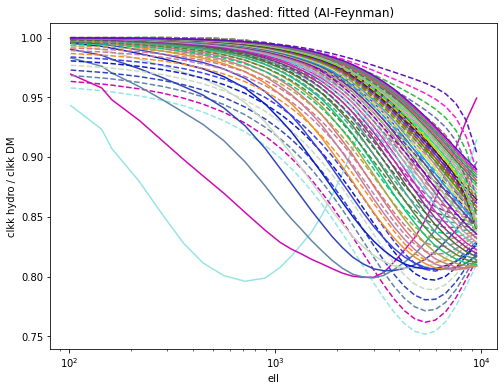

In [31]:
seed(20)
f, ax = subplots(1,1,figsize=(8,6))
for i in range(40):
  icolor=rand(3)
  iz=zs[i]
  iratio = ratios[i,:,1]
  iratio_pred = fitted_feynman_func(iz, ell)
  ax.plot(ell, iratio, color=icolor)
  ax.plot(ell, iratio_pred, '--', color=icolor)
ax.set_xlabel('ell')
ax.set_ylabel('clkk hydro / clkk DM')
ax.set_xscale('log')
ax.set_title('solid: sims; dashed: fitted (AI-Feynman)')
show()